# To predict if a tumor diagnosed is benign or malignant

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [8]:
#Load dataset
data=pd.read_csv("C:/Users/lenovo/Downloads/wbcd.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [ ]:
#We can see there are no null or missing values in our dataset

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
#Converting "data["diagnosis"]" to numeric value

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lbl=LabelEncoder()

In [11]:
data["diagnosis"]=lbl.fit_transform(data["diagnosis"])

In [12]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [13]:
data.drop(["id"],inplace=True,axis=1)    #drop the id column as it is of no use

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [15]:
#Check if dataset is balanced or not, B=0 & M=1
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

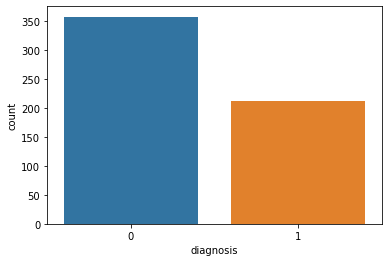

In [16]:
sns.countplot(x="diagnosis",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

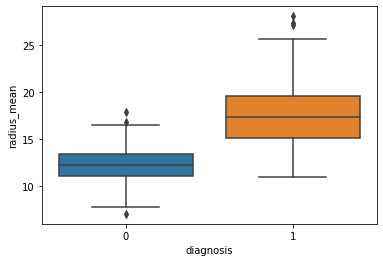

In [17]:
sns.boxplot(x="diagnosis",y="radius_mean", data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='texture_mean'>

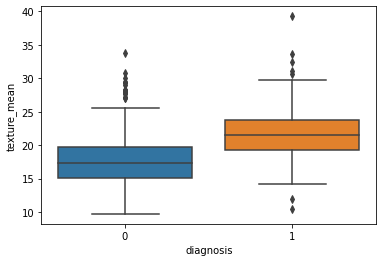

In [18]:
sns.boxplot(x="diagnosis",y="texture_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

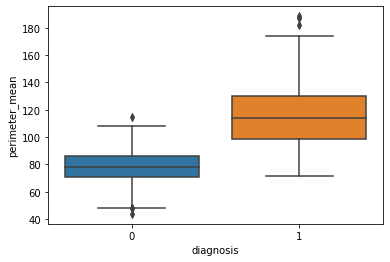

In [19]:
sns.boxplot(x="diagnosis",y="perimeter_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

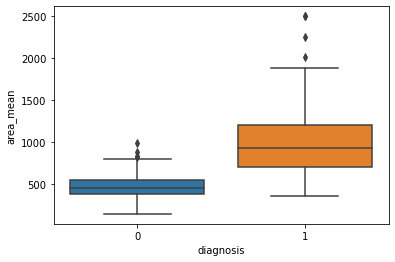

In [20]:
sns.boxplot(x="diagnosis",y="area_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

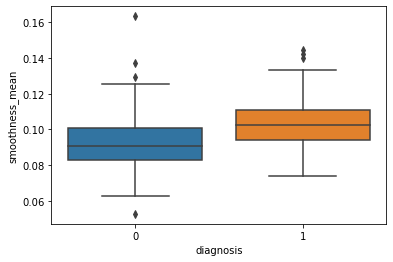

In [21]:
sns.boxplot(x="diagnosis",y="smoothness_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='compactness_mean'>

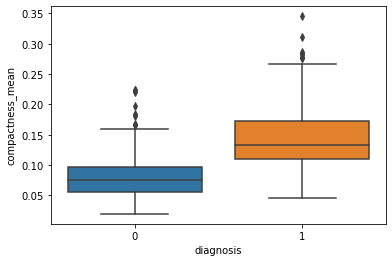

In [22]:
sns.boxplot(x="diagnosis",y="compactness_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

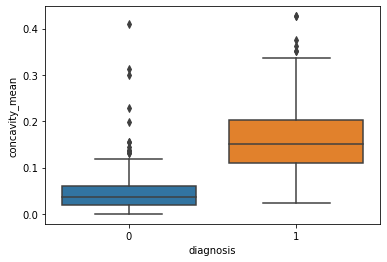

In [23]:
sns.boxplot(x="diagnosis",y="concavity_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='points_mean'>

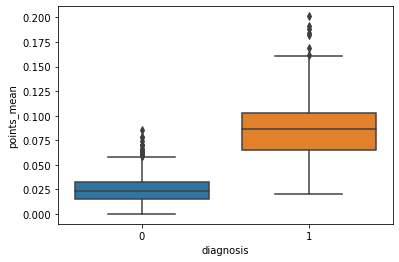

In [24]:
sns.boxplot(x="diagnosis",y="points_mean",data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='symmetry_mean'>

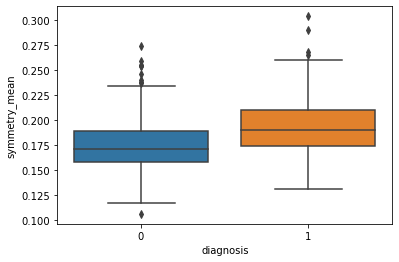

In [25]:
sns.boxplot(x="diagnosis",y="symmetry_mean",data=data)

In [28]:
#Creating 2 different datasets to understand the distribution
Malignant_data=data[(data['diagnosis'] !=0 )]
Benign_data=data[(data['diagnosis'] ==0 )]

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

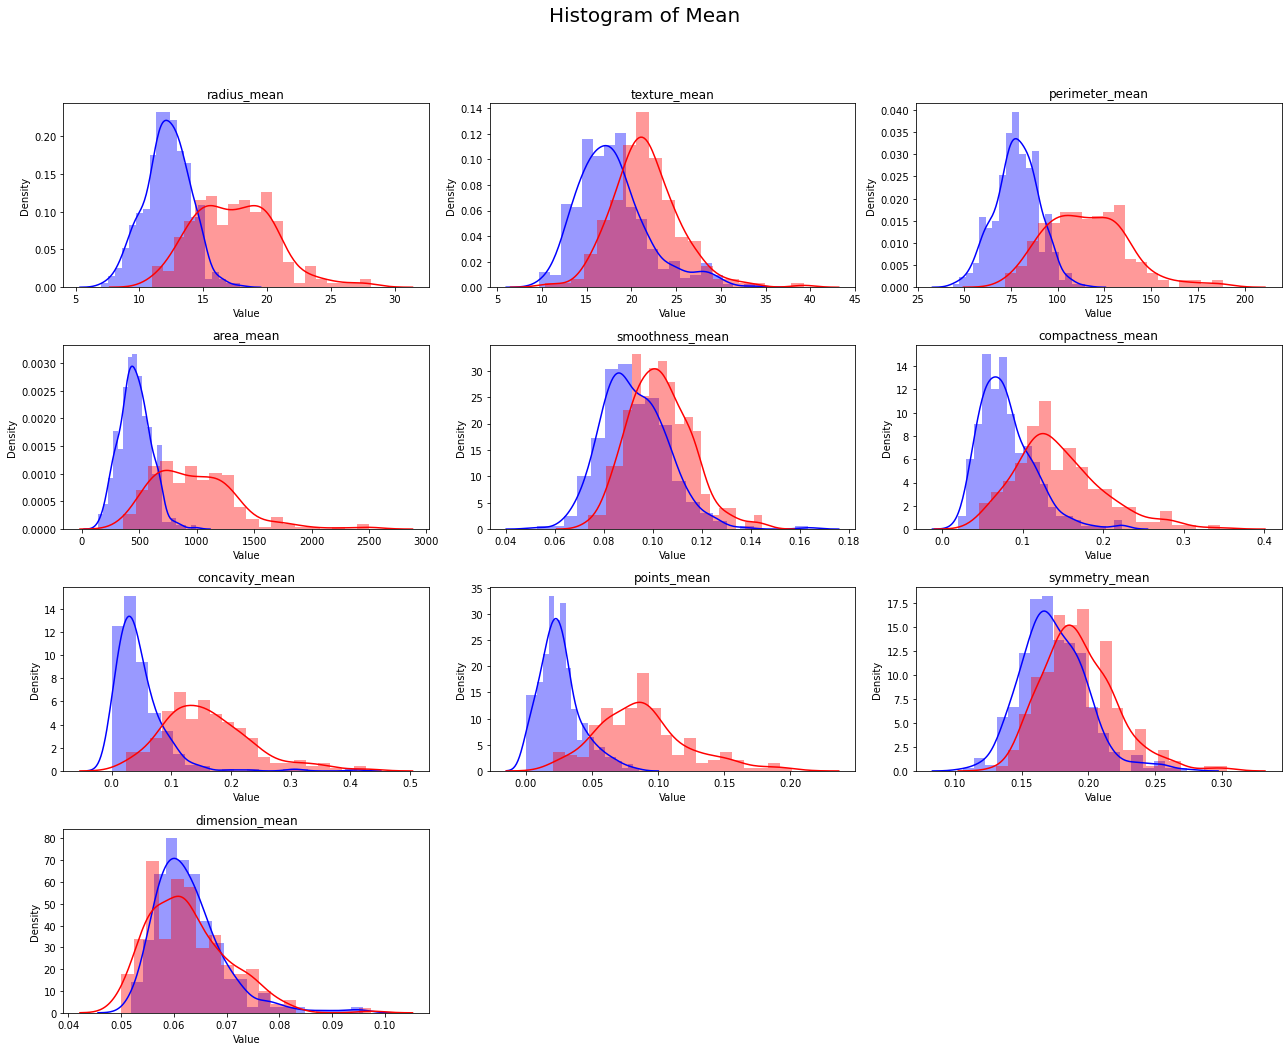

In [34]:
#Plotting histogram

fig=plt.figure(figsize=(18,14),tight_layout=True)

for i,b in enumerate(list(data.columns[1:11])):
    i=i+1
    
    #Create axe object
    ax=fig.add_subplot(4,3,i)
    
    #Plot histogram using seaborn
    sns.distplot(Benign_data[b],label='benign', color="blue", bins=20, hist=True)
    sns.distplot(Malignant_data[b],label='malignant', color="red", bins=20, hist=True)
    
    ax.set_xlabel('Value')
    ax.set_title(b)
    
    plt.suptitle('Histogram of Mean', size=20, y=1.04)

    
    
    

In [ ]:
#Features having most overlap cannot be considered.
''''
GOOD INPUT FEATURES
radius_mean
perimeter_mean
area_mean
concavity_mean
points_mean
compactness_mean
''''


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

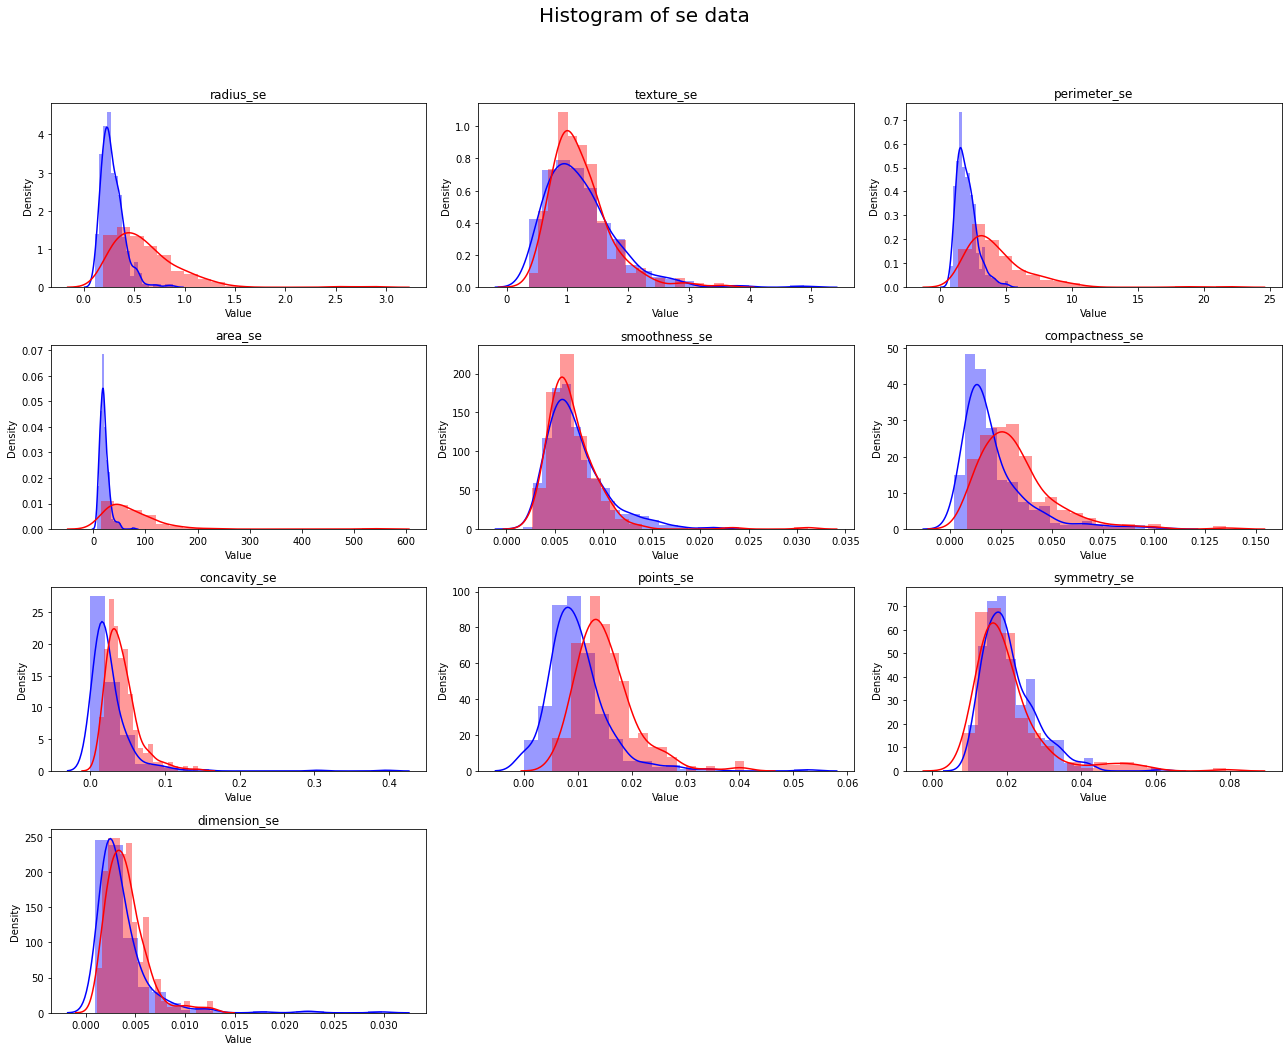

In [35]:
#Plotting histogram

fig=plt.figure(figsize=(18,14),tight_layout=True)

for i,b in enumerate(list(data.columns[11:21])):
    i=i+1
    
    #Create axe object
    ax=fig.add_subplot(4,3,i)
    
    #Plot histogram using seaborn
    sns.distplot(Benign_data[b],label='benign', color="blue", bins=20, hist=True)
    sns.distplot(Malignant_data[b],label='malignant', color="red", bins=20, hist=True)
    
    ax.set_xlabel('Value')
    ax.set_title(b)
    
    plt.suptitle('Histogram of se data', size=20, y=1.04)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

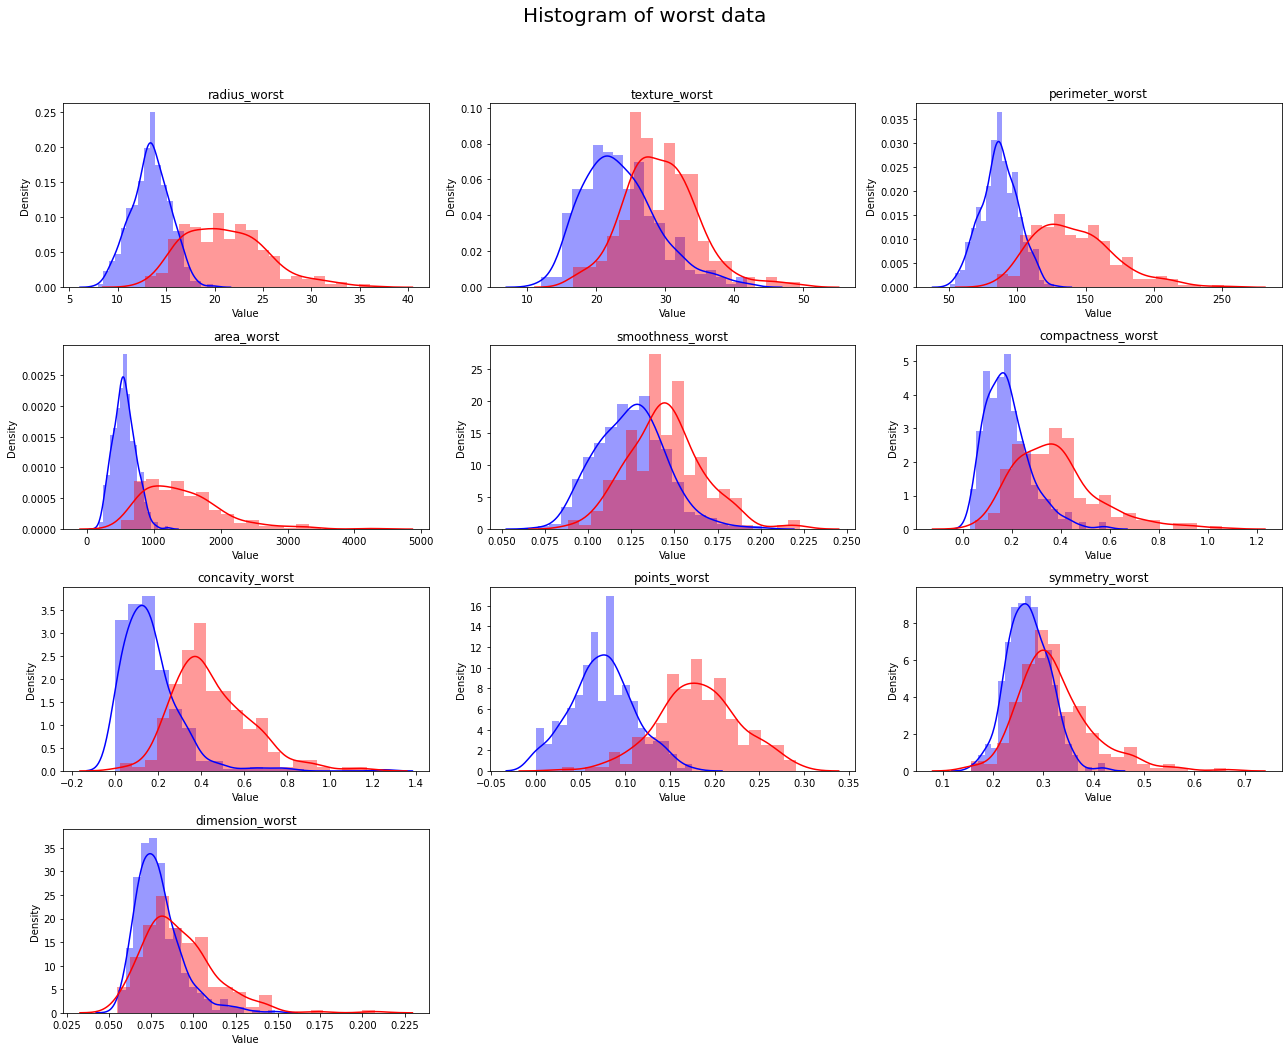

In [36]:
#Plotting histogram

fig=plt.figure(figsize=(18,14),tight_layout=True)

for i,b in enumerate(list(data.columns[21:])):
    i=i+1
    
    #Create axe object
    ax=fig.add_subplot(4,3,i)
    
    #Plot histogram using seaborn
    sns.distplot(Benign_data[b],label='benign', color="blue", bins=20, hist=True)
    sns.distplot(Malignant_data[b],label='malignant', color="red", bins=20, hist=True)
    
    ax.set_xlabel('Value')
    ax.set_title(b)
    
    plt.suptitle('Histogram of worst data', size=20, y=1.04)

In [37]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [39]:
#Separate I/P and O/P features
X=data.iloc[:,1:]
Y=data['diagnosis']

In [43]:
#Normalizing/Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_std=scaler.fit_transform(X)
X_std

array([[-0.51329651, -1.60559452, -0.54037561, ..., -0.31513306,
        -0.11932056, -0.89972108],
       [-1.00180093, -0.07903849, -0.93456583, ..., -0.53820271,
         0.06348865, -0.44752801],
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       ...,
       [ 0.32738551,  0.72612674,  0.28631171, ...,  0.12171802,
         0.44366709,  0.7633076 ],
       [ 0.11437486, -1.23559085,  0.07788929, ..., -0.11733956,
        -0.47685008, -0.32395074],
       [ 2.05703196, -0.97495933,  2.03195239, ...,  1.24848623,
        -0.27624528,  0.15040866]])

In [ ]:
#Split the data into train and test data

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X_std, Y, test_size=0.2, random_state=0)

# Apply KNN algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
print("Score on train data is" , knn.score(x_train,y_train))

Score on train data is 0.9912087912087912


In [53]:
print("Score on test data is" , knn.score(x_test,y_test))

Score on test data is 0.9649122807017544


In [54]:
from sklearn.metrics import accuracy_score,classification_report

In [58]:
print("\nK- Nearest Neighbor  -  Train confusion matrix\n", pd.crosstab(y_train,knn.predict(x_train)))
print("\nK- Nearest Neighbor  -  Train Accuracy\n", round(accuracy_score(y_train,knn.predict(x_train)),3))
print("\nK- Nearest Neighbor  -  Train classification report\n", classification_report(y_train,knn.predict(x_train)))

print("\nK- Nearest Neighbor  -  Test confusion matrix\n", pd.crosstab(y_test,knn.predict(x_test)))
print("\nK- Nearest Neighbor  -  Test Accuracy\n", round(accuracy_score(y_test,knn.predict(x_test)),3))
print("\nK- Nearest Neighbor  -  Test classification report\n", classification_report(y_test,knn.predict(x_test)))


K- Nearest Neighbor  -  Train confusion matrix
 col_0        0    1
diagnosis          
0          280    0
1            4  171

K- Nearest Neighbor  -  Train Accuracy
 0.991

K- Nearest Neighbor  -  Train classification report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       280
           1       1.00      0.98      0.99       175

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455


K- Nearest Neighbor  -  Test confusion matrix
 col_0       0   1
diagnosis        
0          76   1
1           3  34

K- Nearest Neighbor  -  Test Accuracy
 0.965

K- Nearest Neighbor  -  Test classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.97      0.92      0.94        37

    accuracy                           0.96       114
   mac

In [ ]:
#Trying different values of K

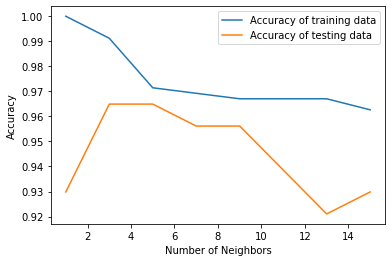

In [66]:
train_accuracy=[]
test_accuracy=[]

neighbors_count= range(1,16,2)

for n in neighbors_count:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    train_accuracy.append(accuracy_score(y_train,knn.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
    
plt.plot(neighbors_count,train_accuracy, label="Accuracy of training data")
plt.plot(neighbors_count,test_accuracy, label="Accuracy of testing data")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()